參考資料：
1. AE in keras: https://blog.keras.io/building-autoencoders-in-keras.html
- Autoencoder 自编码:https://morvanzhou.github.io/tutorials/machine-learning/keras/2-6-autoencoder/
- https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
- http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_psnr
- http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim

In [51]:
import time #時間計算

In [52]:
_startTime = time.time()

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from cv2 import imwrite # 圖片輸出用

##### 函數 - 輸出用

In [54]:
def ResultImgShow(inputImg, modelName, strImgLabel = "TMP"):
    """ modelName: 檔名依據。 strImgLabel: 檔名特徵"""
    # 輸出參數設置
    img_amount = inputImg.shape[0]
    cols_output = 50
    rows_output = img_amount // cols_output
    if rows_output < 3:
        cols_output = 10
        rows_output = img_amount // cols_output
        if rows_output < 3:
            cols_output = 5
            rows_output = img_amount // cols_output
    if rows_output > cols_output:
        rows_output = cols_output
    # 輸出設置
    img_h = inputImg[0]
    for i in range(1, cols_output):
        img_tmp = inputImg[i]
        img_h = np.hstack((img_h, img_tmp))
    img_v = img_h.copy()
    for j in range(1, rows_output):
        img_h = inputImg[j * cols_output]
        for i in range(1, cols_output):
            img_tmp = inputImg[j * cols_output + i]
            img_h = np.hstack((img_h, img_tmp))
        img_v = np.vstack((img_v, img_h))
        
        
    # 顯示 與 存取
    imwrite(modelName.split(".")[0] +"_"+ strImgLabel+ ".png", img_v)
    plt.imshow(img_v, cmap = "gray")
#     plt.savefig(model_name.split(".")[0] +"_"+ strImgLabel+ ".png")
    plt.show()
    plt.close()
    return

In [55]:
# def DataPreProcess(inputData, img_rows = 28, img_cols = 28):
#     outputData = inputData.reshape(inputData.shape[0], img_rows * img_cols)
#     outputData = outputData.astype('float32') /255 -0.5
#     outputData *= 2
#     return outputData

In [56]:
def DataRecovery(inputData, img_rows = 28, img_cols = 28):
    outputData = ((inputData /2)+0.5) * 255
    outputData = outputData.reshape((outputData.shape[0], img_rows, img_cols))
    outputData = outputData.astype('uint8')
    return outputData

#### 參數設置

In [57]:
outputFolder = "output_1212_e500_predict/"

In [58]:
dataSetName = "mnist.npz"
f = np.load(dataSetName)
x_test_org = f['x_test']
del f

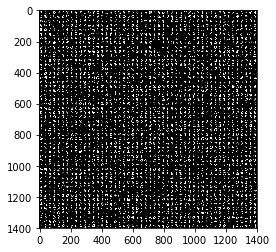

In [59]:
ResultImgShow(x_test_org, outputFolder + "IN", strImgLabel = "ORIGIN")

In [60]:
def DataPreProcess(inputData, img_rows = 28, img_cols = 28):
    outputData = inputData.reshape(inputData.shape[0], img_rows * img_cols)
    outputData = outputData.astype('float32') /255 -0.5
    outputData *= 2
    return outputData

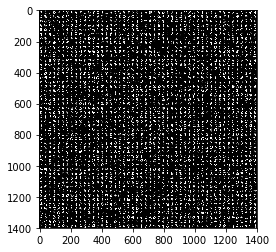

In [61]:
x_test_org_ = DataPreProcess(x_test_org)
x_test_org_ = DataRecovery(x_test_org_)
ResultImgShow(x_test_org_, "PROCESSED", strImgLabel = "ORIGIN+2")

In [62]:
def DataPreProcess(inputData, img_rows = 28, img_cols = 28):
    outputData = inputData.reshape(inputData.shape[0], img_rows * img_cols)
    outputData = outputData.astype('float32') /255 -0.5
#     outputData *= 2
    return outputData

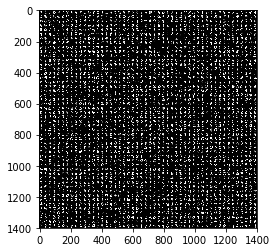

In [63]:
x_test_org_ = DataPreProcess(x_test_org)
x_test_org_ = DataRecovery(x_test_org_)
ResultImgShow(x_test_org_, "PROCESSED", strImgLabel = "ORIGIN-2")